<a href="https://colab.research.google.com/github/HackersOm/ML_practical_programs/blob/main/practical_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#Loading Titanic Dataset from kaggle


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)
!ls /kaggle/input/titanic-dataset

Path to dataset files: /kaggle/input/titanic-dataset
Titanic-Dataset.csv


In [ ]:
df = pd.read_csv(path+"//Titanic-Dataset.csv")


#Exploring Dataset

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Preprocessing
**Handling missing Values**

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


In [ ]:
df.to_csv("Perprocessed_Titanic.csv",index=False)

#Spliting data in Features and Lables
## - Independent variables : PassengerId, Pclass, 	Name,	Sex,	Age,	SibSp,	Parch	Ticket,	Fare,	Cabin,	Embarked
## - Dependent variable : Survived

In [ ]:
features = df.drop(["Survived","Name"],axis=1)

In [ ]:
label = df["Survived"]

In [ ]:
features.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,0,35.0,1,0,113803,53.1000,C123,2
4,5,3,1,35.0,0,0,373450,8.0500,B96 B98,2


In [ ]:
label.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
corr = features.corr(numeric_only=True)

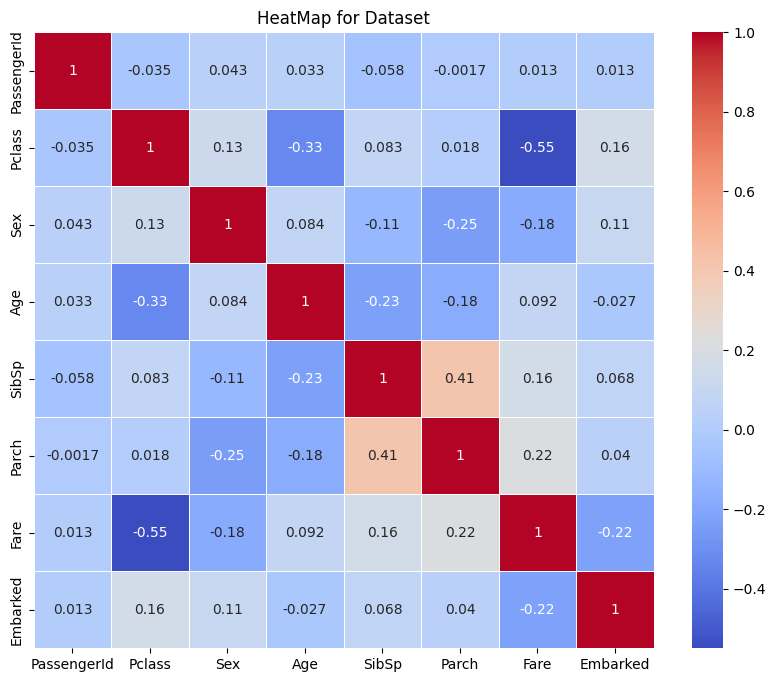

In [ ]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("HeatMap for Dataset")
plt.show()

In [ ]:
# Step 5 : Applied Standardization
# Identify numerical columns
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print("\nNumerical Columns:", numerical_cols)

scaler = StandardScaler();
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nAfter Scaling (StandardScaler):")
print(df[numerical_cols].head())



# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.2, random_state=42)

print("\nShapes of Train/Test Sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", Y_train.shape)
print("y_test:", Y_test.shape)


Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

After Scaling (StandardScaler):
   PassengerId  Survived    Pclass       Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377  0.737695 -0.592481  0.432793 -0.473674   
1    -1.726220  1.266990 -1.566107 -1.355574  0.638789  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377 -1.355574 -0.284663 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107 -1.355574  0.407926  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377  0.737695  0.407926 -0.474545 -0.473674   

       Fare  Embarked  
0 -0.502445  0.585954  
1  0.786845 -1.942303  
2 -0.488854  0.585954  
3  0.420730  0.585954  
4 -0.486337  0.585954  

Shapes of Train/Test Sets:
X_train: (712, 10)
X_test: (179, 10)
y_train: (712,)
y_test: (179,)
